<a href="https://colab.research.google.com/github/ashiq-056/Clustering/blob/main/Birch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving data.xlsx to data.xlsx


In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score
from sklearn.metrics.cluster import adjusted_rand_score, normalized_mutual_info_score
from sklearn.cluster import Birch
import time

In [ ]:
df = pd.read_excel("data.xlsx")
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [ ]:
T = []
l = list(df['Gender'])
for i in l:
  if i == 'Male':
    T.append(True)
  else:
    T.append(False)

In [ ]:
colors = {True: 'red', False: 'green'}
T_col = [colors[i] for i in T]

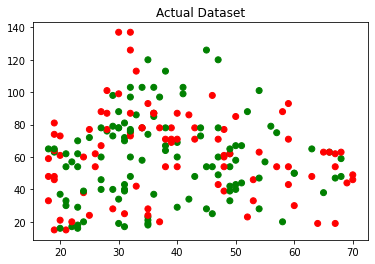

In [ ]:
plt.title('Actual Dataset')
plt.scatter(df['Age'], df['Annual Income (k$)'], c=T_col)

In [ ]:
X = df[['Age', 'Annual Income (k$)']].iloc[: , :].values

In [ ]:
brc = Birch(branching_factor=50, n_clusters=2, threshold=1.5)

In [ ]:
brc.fit(X)

Birch(branching_factor=50, compute_labels=True, copy=True, n_clusters=2,
      threshold=1.5)

In [ ]:
labels = brc.predict(X)
labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [ ]:
df["Predict"] = labels

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

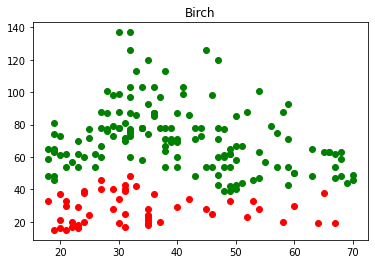

In [ ]:
df1 = df[df.Predict==0]
df2 = df[df.Predict==1]
#df3 = df[df.Predict==2]
#df4 = df[df.Predict==3]
plt.title("Birch")
plt.scatter(df1["Age"],df1['Annual Income (k$)'],c='green', label='c1')
plt.scatter(df2["Age"],df2['Annual Income (k$)'],c='red', label='c2')
#plt.scatter(df3["Age"],df3['Annual Income (k$)'],c='black', label='c3')
#plt.scatter(df4["Age"],df4['Annual Income (k$)'],color='blue')
from google.colab import files
plt.savefig("clustered.png")
files.download("clustered.png")

In [ ]:
silhouette = silhouette_score(X, labels)
silhouette

0.39477079263901876

In [ ]:
for i in range(len(T)):
  if T[i] == True:
    T[i] = 1
  else:
    T[i] = 0

In [ ]:
ari = adjusted_rand_score(T, labels)
ari

-0.0063670217783478355

In [ ]:
nmi = normalized_mutual_info_score(T, labels)
nmi

0.008513589999674701

In [ ]:
th = [0.5,1.0,2.0,2.5]

Comparison with different threshholld

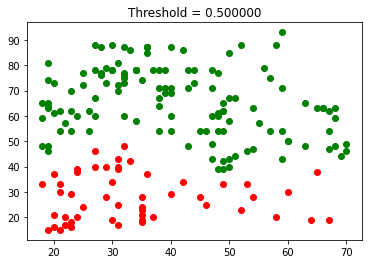

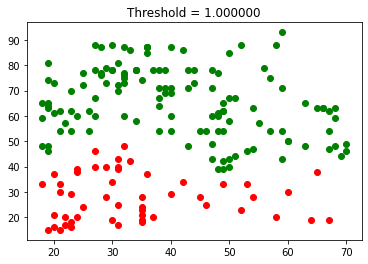

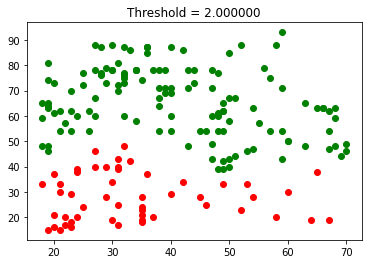

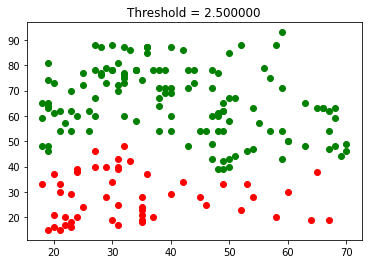

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 432x288 with 0 Axes>

In [ ]:
t = []
for i in th:
  start_time = time.time()
  br = Birch(branching_factor=50, n_clusters=2, threshold=i)
  br.fit(X)
  t.append(time.time() - start_time)
  #print("--- %s seconds ---" % (time.time() - start_time))
  label = brc.predict(X)
  df["Predict"] = labels
  df1 = df[df.Predict==0]
  df2 = df[df.Predict==1]
  #df3 = df[df.Predict==2]
  plt.title("Threshold = %f" %i)
  plt.scatter(df1["Age"],df1['Annual Income (k$)'],c='green', label='c1')
  plt.scatter(df2["Age"],df2['Annual Income (k$)'],c='red', label='c2')
  #plt.scatter(df3["Age"],df3['Annual Income (k$)'],c='black', label='c3')
  plt.show()

In [ ]:
for i in range(len(t)):

  print("for threshold", th[i] , "convergance time ", t[i])

for threshold 0.5 convergance time  0.02042078971862793
for threshold 1.0 convergance time  0.024953842163085938
for threshold 2.0 convergance time  0.019823074340820312
for threshold 2.5 convergance time  0.020901918411254883
